# ESport Earnings Analysis

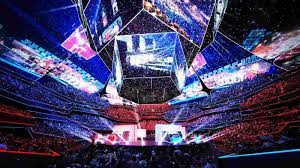


## Let's take a look at the earnings from ESport

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

pd.set_option('display.max_columns', 500)

### ESport Earnings 1980 - 2021

In [2]:
files = glob("C:/Users/Asus/OneDrive/Máy tính/eSport 1/*")
general = pd.read_csv(files[0], encoding = 'ISO-8859-1')
hist = pd.read_csv(files[1], encoding = 'ISO-8859-1', parse_dates = ['Date'])
hist['Game'] = hist['Game'].str.title().replace('Counter-Strike: Global Offensive', 'CS:GO').\
    replace("Playerunknown'S Battlegrounds Mobile", "PUBM").\
    replace("PlayerunknownS Battlegrounds", "PUB")
hist['Year'] = hist['Date'].dt.year
hist['Year'] = hist['Year'].astype('int')

In [3]:
top_10_games = hist.groupby(['Game'])['Earnings'].sum().sort_values(ascending=False).index[:10]

In [4]:
pal = sns.color_palette()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11308\1077267838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Year'] = d['Year'].astype('category')


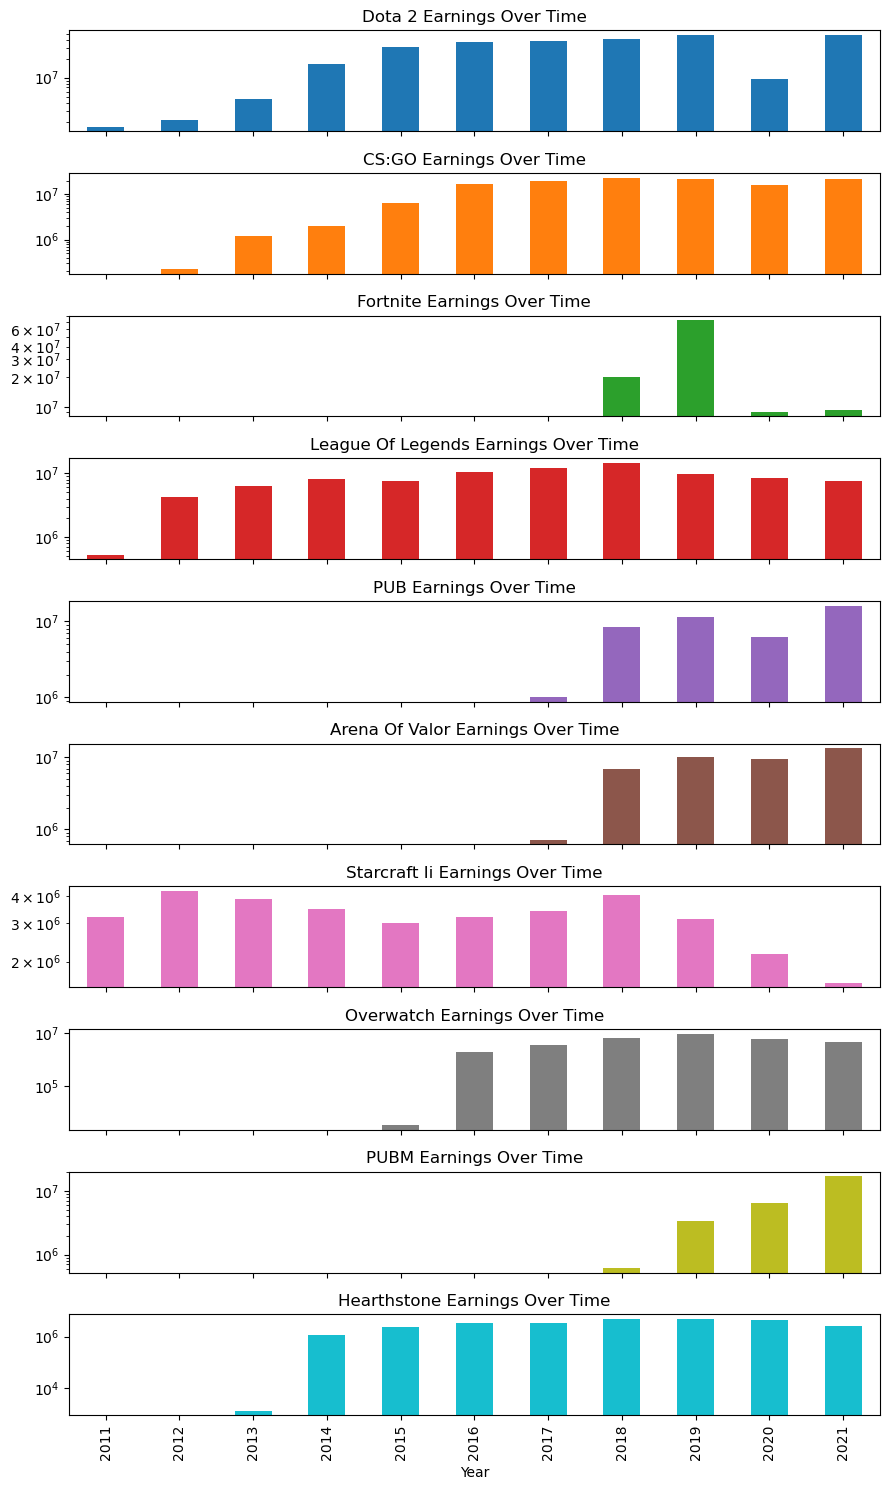

In [5]:
fig, axs = plt.subplots(10, 1, sharex = True, figsize=(9,15))
d = hist.query('Year > 2010')
d['Year'] = d['Year'].astype('category')
for i, g in enumerate(top_10_games):
    d.loc[hist['Game'] == g].\
        query('Year > 2010').\
        sort_values('Date').\
        set_index('Date').groupby('Year')['Earnings'].sum()\
        .plot(ax = axs[i],
              kind = 'bar',
#               ylim=(0,72_800_079),
              title = f'{g} Earnings Over Time',
              color = pal[i])
    axs[i].set_yscale('log')
    
    
plt.tight_layout()
plt.show()

### Distribution of Earnings by Game/Year

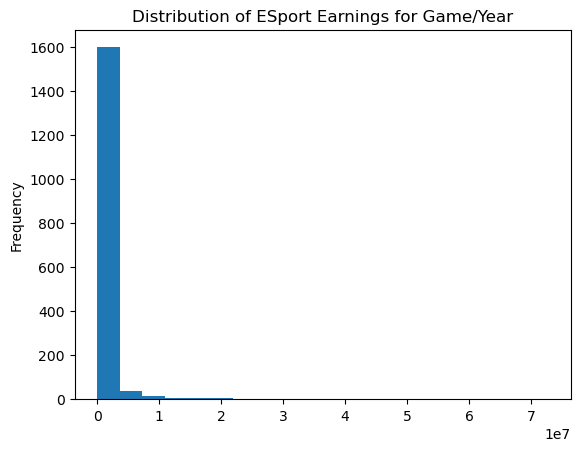

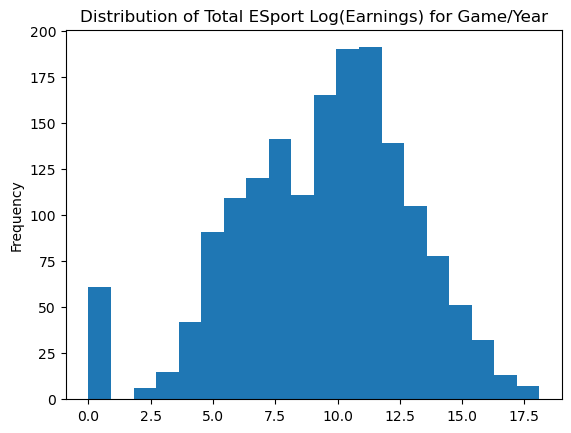

In [6]:
year_earnings = hist.groupby(['Game','Year'])['Earnings'].sum()
year_earnings.plot(kind='hist',bins=20,title='Distribution of ESport Earnings for Game/Year')
plt.show()

year_earnings = year_earnings.reset_index()
year_earnings['Earnings_log'] = year_earnings['Earnings'].apply(np.log1p)
year_earnings['Earnings_log'].plot(kind='hist',bins=20,title='Distribution of Total ESport Log(Earnings) for Game/Year')
plt.show()

### Top Game/Year

In [7]:
df = hist.groupby(['Year','Game'])['Earnings'].sum().\
    sort_values(ascending=False).head(30).\
    sort_values().reset_index()


df['Game_Year'] = df['Game'] + '(' + df['Year'].astype('str') + ')'

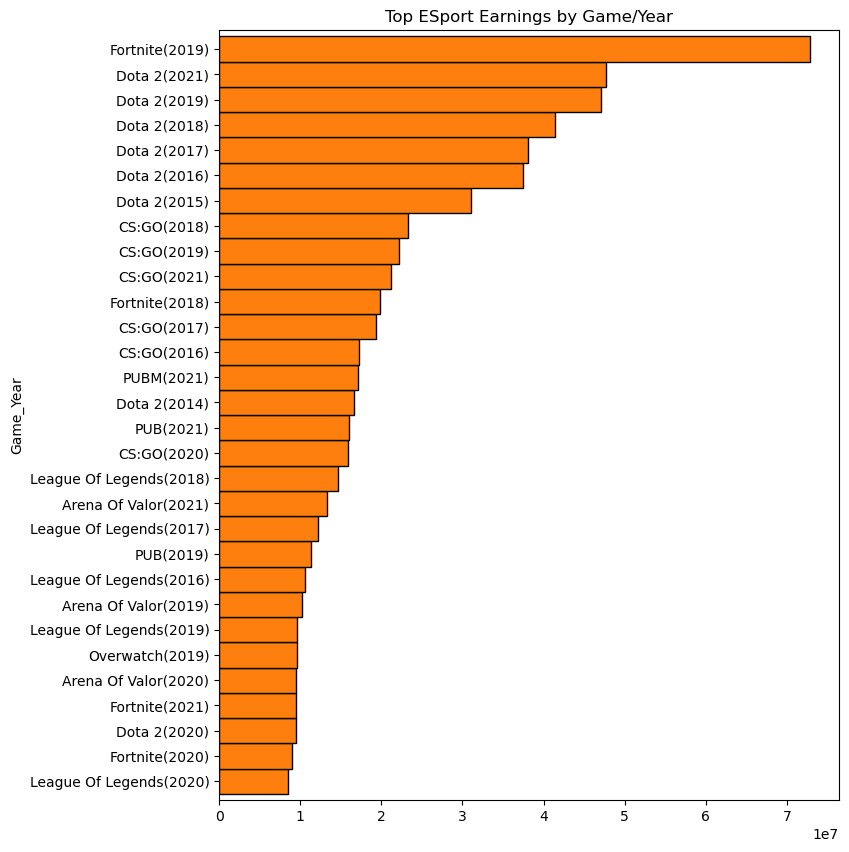

In [8]:
df.set_index('Game_Year')['Earnings'].\
    plot(kind='barh',
         figsize=(8,10),
         title = 'Top ESport Earnings by Game/Year',
        color = pal[1],
        width = 1, edgecolor = 'black')
plt.show()

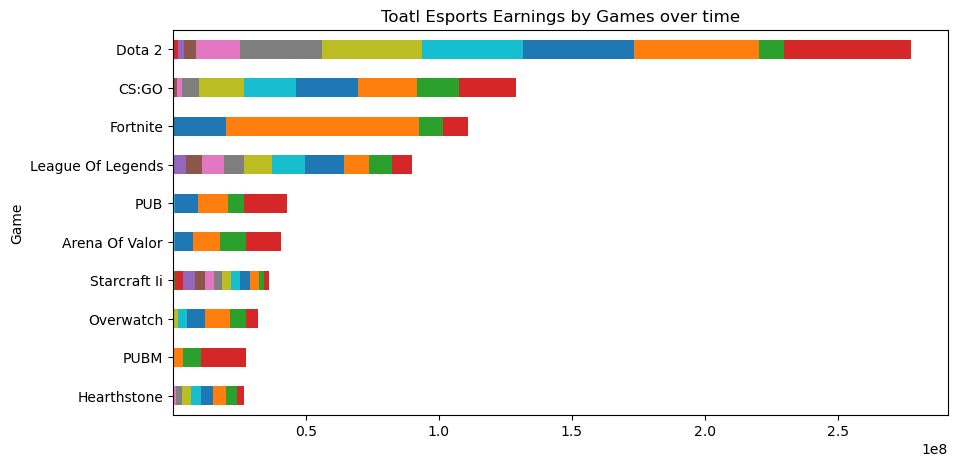

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
df_temp = hist.groupby(['Game','Year'])['Earnings'].sum().unstack()
top_games = df_temp.sum(axis=1).sort_values(ascending = False).head(10).sort_values().index
df_temp.loc[top_games].plot(kind='barh',stacked = True,ax=ax)
ax.set_title("Toatl Esports Earnings by Games over time")
plt.legend().remove()